### <font color='red'> Buzz Prediction on Twitter

Project Description:
- Use same datasets as previous project.
- Run all the models only on 10% data. Use code given in previous project for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in previous project again on data you get from PCA. Compare your results with results in previous project. You don't need to apply all the models twice. Just copy the result table from previous project, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in previous project again on data you get from PCA. Compare your results with results in previous project. You don't need to apply all the models twice. Just copy the result table from previous project, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class


In [1]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

Saving Twitter.data to Twitter.data
User uploaded file "Twitter.data" with length 283252207 bytes


## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # b/w 0 & 1

C:\Users\mahee\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Read data into dataframe

In [2]:
cols = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Anotation']
df = pd.read_csv('Twitter.data', header = None)
df.columns = cols

In [3]:
df.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Anotation
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [4]:
df.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Anotation
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


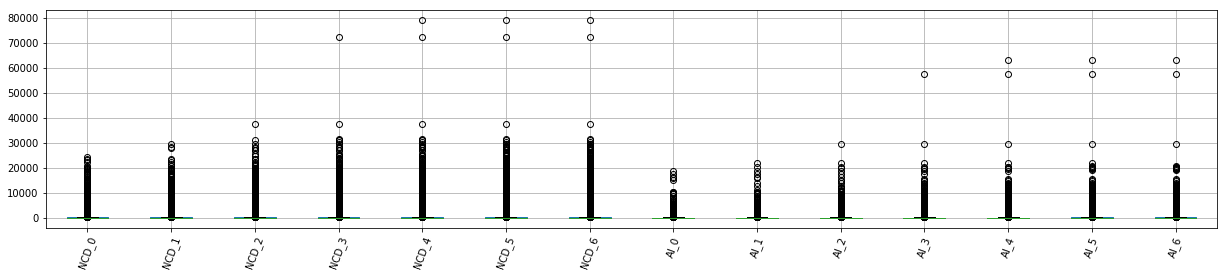

In [5]:
#exploring the data to check statistical dispersion
df.boxplot(column = cols[0:14], rot = 70, figsize= (21, 4))

In [6]:
_, sample_data, _, sample_target = train_test_split(df.iloc[:, 0:-1], df.iloc[:, -1], random_state = 0, test_size = 0.1)
X_train_1, X_test_1, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0, test_size = 0.2)
scaler = MinMaxScaler()
X_train_mm = pd.DataFrame(scaler.fit_transform(X_train_1))
X_test_mm = pd.DataFrame(scaler.transform(X_test_1))
#X_train = X_train_mm
#X_test = X_test_mm
X_train_mm.shape


(46660, 77)

## 1. Bagging & Pasting

### Bagging
* Bootstrap aggregating, also called bagging, is a machine learning ensemble algorithm. It also reduces variance and helps to avoid overfitting.
* It involves having each model in the ensemble vote with equal weight.

### Pasting
* In case of Pasting, the same process applies, only difference being that pasting doesn’t allow training instances to be sampled several times for the same predictors.

### Linear Regression - Bagging

In [7]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
bag_lreg = BaggingRegressor(lreg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_lreg.fit(X_train_mm, y_train)
y_pred = bag_lreg.predict(X_test_mm)

print('Linear Regression - Train score: {:.2f}'.format(bag_lreg.score(X_train_mm, y_train)))
print('Linear Regression - Test score: {:.2f}'.format(bag_lreg.score(X_test_mm, y_test)))

Linear Regression - Train score: 0.87
Linear Regression - Test score: 0.88


### Linear Regression - Pasting

In [8]:
from sklearn.ensemble import BaggingRegressor
#LINEAR REGRESSION with the normal equation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
pas_lreg = BaggingRegressor(lreg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

pas_lreg.fit(X_train_mm, y_train)
y_pred = pas_lreg.predict(X_test_mm)

print('Linear Regression - Train score: {:.2f}'.format(bag_lreg.score(X_train_mm, y_train)))
print('Linear Regression - Test score: {:.2f}'.format(bag_lreg.score(X_test_mm, y_test)))

Linear Regression - Train score: 0.87
Linear Regression - Test score: 0.88


### KNN Regression - Bagging

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knreg = KNeighborsRegressor(n_neighbors = 3)
bag_knreg = BaggingRegressor(knreg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_knreg.fit(X_train_mm, y_train)
y_pred = bag_knreg.predict(X_test_mm)

print('KNN Regression - Train score: {:.2f}'.format(bag_knreg.score(X_train_mm, y_train)))
print('KNN Regression - Test score: {:.2f}'.format(bag_knreg.score(X_test_mm, y_test)))

KNN Regression - Train score: 0.50
KNN Regression - Test score: 0.55


### KNN Regression - Pasting

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knreg = KNeighborsRegressor(n_neighbors = 3)
pas_knreg = BaggingRegressor(knreg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

pas_knreg.fit(X_train_mm, y_train)
y_pred = pas_knreg.predict(X_test_mm)

print('KNN Regression - Train score: {:.2f}'.format(bag_knreg.score(X_train_mm, y_train)))
print('KNN Regression - Test score: {:.2f}'.format(bag_knreg.score(X_test_mm, y_test)))

KNN Regression - Train score: 0.50
KNN Regression - Test score: 0.55


## Adaboosting

* It focuses on Regression problems and aims to convert a set of weak regressors into a strong one.

### Linear Regression - Adaboosting

In [11]:
from sklearn.ensemble import AdaBoostRegressor

ada_lreg = AdaBoostRegressor(LinearRegression(), n_estimators=200, learning_rate=0.5, random_state=0)
ada_lreg.fit(X_train_mm, y_train)

print('Linear Regression - Train score: {:.2f}'.format(ada_lreg.score(X_train_mm, y_train)))
print('Linear Regression - Test score: {:.2f}'.format(ada_lreg.score(X_test_mm, y_test)))

Linear Regression - Train score: 0.92
Linear Regression - Test score: 0.90


### Ridge - Adaboosting

In [12]:
from sklearn.ensemble import AdaBoostRegressor
ridge = Ridge(alpha= 0.001, fit_intercept=True, normalize = True)
ada_ridge = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=0.5, random_state=0)
ada_ridge.fit(X_train_mm, y_train)

print('KNN Regression - Train score: {:.2f}'.format(ada_ridge.score(X_train_mm, y_train)))
print('KNN Regression - Test score: {:.2f}'.format(ada_ridge.score(X_test_mm, y_test)))

KNN Regression - Train score: 0.94
KNN Regression - Test score: 0.92


## Gradient Boosting
* The idea is to use the weak learning method several times, each one refocused on the examples that the previous ones found to have higher errors.

In [13]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=0)
gbrt.fit(X_train_mm, y_train)

print('Gradient Boosting Regressor - Train score: {:.2f}'.format(gbrt.score(X_train_mm, y_train)))
print('Gradient Boosting Regressor - Test score: {:.2f}'.format(gbrt.score(X_test_mm, y_test)))

Gradient Boosting Regressor - Train score: 0.86
Gradient Boosting Regressor - Test score: 0.83


## PCA

PCA reduces number of dimensions by grouping possible correlated variables to uncorrelated Principle components.
Though this handles the curse of dimensionality, it takes away the ability to interpret the model

In [5]:
from sklearn.decomposition import PCA

X_final=df.iloc[:,:-1]

pca = PCA()
pca.fit(X_train_mm)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("dimensions: " + str(d))

dimensions: 7


In [6]:
pca = PCA(n_components=0.95)
X_train = pd.DataFrame(pca.fit_transform(X_train_mm))
X_test = pd.DataFrame(pca.transform(X_test_mm))

print("Number of components " + str(pca.n_components_))
#print("\n First Row :")
#print(X_reduced.iloc[1:5,:])
#print(X_train_red.info(),X_test_red.info())

Number of components 7


### LINEAR REGRESSION - PCA

In [0]:
#LINEAR REGRESSION with the normal equation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
param_grid = {}
grid_lreg = GridSearchCV(LinearRegression(), param_grid, cv=5, n_jobs= -1)
grid_lreg.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_lreg.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_lreg.best_score_))

Best Parameters : {}
Best CV score   : 0.026


In [0]:
lreg_train_accuracy = grid_lreg.best_estimator_.score(X_train, y_train)
lreg_test_accuracy  = grid_lreg.best_estimator_.score(X_test, y_test)

print('Linear Regression Normal Eqn - Train Accuracy: {}'.format('%.3f'%lreg_train_accuracy))
print('Linear Regression Normal Eqn - Test Accuracy : {}'.format('%.3f '%lreg_test_accuracy))

table = []
table.append(['Linear Regression', grid_lreg.best_params_, lreg_train_accuracy, lreg_test_accuracy] )

Linear Regression Normal Eqn - Train Accuracy: 0.026
Linear Regression Normal Eqn - Test Accuracy : 0.028 


# KNN REGRESSION

Regression based on k-nearest neighbors. The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set. When predicting the dependent variable for this dataset, KNN Regressor produces a score of greater than 0.9 in test accuracy, however there are other models with superior scores.

In [0]:
# KNN REGRESSION
from sklearn.neighbors import KNeighborsRegressor

kn_reg = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1,11)}
grid_kn = GridSearchCV(kn_reg, param_grid=param_grid, cv = 5, n_jobs= -1, return_train_score= True)
grid_kn.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_kn.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_kn.best_score_))

Best Parameters : {'n_neighbors': 8}
Best CV score   : 0.864


Text(0.5,1,'kn regressor scores')

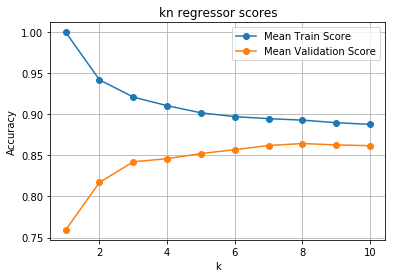

In [0]:
x_axis = range(1,11)
plt.plot(x_axis, grid_kn.cv_results_['mean_train_score'], '-o', label = 'Mean Train Score')
plt.plot(x_axis, grid_kn.cv_results_['mean_test_score'], '-o', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('kn regressor scores')

In [0]:
kn_train_accuracy = grid_kn.best_estimator_.score(X_train, y_train)
kn_test_accuracy  = grid_kn.best_estimator_.score(X_test, y_test)

print('KN Regression - Train Accuracy: {}'.format('%.3f'%kn_train_accuracy))
print('KN Regression - Test Accuracy : {}'.format('%.3f '%kn_test_accuracy))

table.append(['KN Regression', grid_kn.best_params_, kn_train_accuracy, kn_test_accuracy])

KN Regression - Train Accuracy: 0.892
KN Regression - Test Accuracy : 0.891 


In [0]:
# RIDGE
from  sklearn.linear_model import Ridge

powers = range(-3, 3)
x_range = []
for power in powers:
    x_range.append(10 ** power)

ridge = Ridge()
param_grid = {'alpha': x_range, 'fit_intercept': [True, False], 'normalize': [True, False]}
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, n_jobs= -1)
grid_ridge.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_ridge.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_ridge.best_score_))

Best Parameters : {'alpha': 100, 'fit_intercept': True, 'normalize': False}
Best CV score   : 0.026


# RIDGE

Ridge Regression (also called Tikhonov regularization) solves a regression model where the loss function is the linear least squares function  (with l2 regularization) as opposed to ordinary least squares. 
This model minimizes the objective function: ||y - Xw||^2_2 + alpha * ||w||^2_2

Ridge Regression produced the second-best test score when prediciting the dependent variable in this dataset.

In [0]:
# RIDGE
from  sklearn.linear_model import Ridge

powers = range(-3, 3)
x_range = []
for power in powers:
    x_range.append(10 ** power)

ridge = Ridge()
param_grid = {'alpha': x_range, 'fit_intercept': [True, False], 'normalize': [True, False]}
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, n_jobs= -1)
grid_ridge.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_ridge.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_ridge.best_score_))

Best Parameters : {'alpha': 100, 'fit_intercept': True, 'normalize': False}
Best CV score   : 0.026


In [0]:
ridge_train_accuracy = grid_ridge.best_estimator_.score(X_train, y_train)
ridge_test_accuracy  = grid_ridge.best_estimator_.score(X_test, y_test)

print('Ridge - Train Accuracy: {}'.format('%.3f'%ridge_train_accuracy))
print('Ridge - Test Accuracy : {}'.format('%.3f '%ridge_test_accuracy))

table.append(['Ridge', grid_ridge.best_params_, ridge_train_accuracy, ridge_test_accuracy])

Ridge - Train Accuracy: 0.026
Ridge - Test Accuracy : 0.028 


Text(0.5,1,'Ridge CV Results')

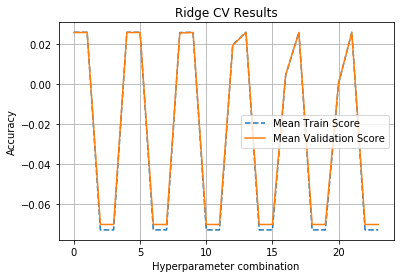

In [0]:
plt.plot(np.arange(0, len(grid_ridge.cv_results_['mean_test_score'])), grid_ridge.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_ridge.cv_results_['mean_train_score'])), grid_ridge.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('Ridge CV Results')

# LASSO

LASSO or Least Absolute Shrinkage and Selection Operator is a Linear Model trained with L1 prior as regularizer.
The optimization objective for Lasso is:
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Compared to Ridge regression that can't zero out coefficients, the LASSO does both parameter shrinkage and variable selection automatically. (In Ridge, we either end up including all the coefficients in the model, or none of them at all)

LASSO produces the best prections for the dependent variable in this dataset.

In [0]:
# LASSO

from sklearn.linear_model import Lasso

lasso = Lasso()
param_grid = {'alpha': x_range, 'max_iter': [1000, 10000], 'selection': ['cyclic', 'random']}
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, n_jobs= -1)
grid_lasso.fit(X_train_mm, y_train)

print("Best Parameters : {}".format(grid_lasso.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_lasso.best_score_))

Best Parameters : {'alpha': 0.001, 'max_iter': 1000, 'selection': 'cyclic'}
Best CV score   : 0.955


In [0]:
lasso_train_accuracy = grid_lasso.best_estimator_.score(X_train_mm, y_train)
lasso_test_accuracy  = grid_lasso.best_estimator_.score(X_test_mm, y_test)

print('LASSO - Train Accuracy: {}'.format('%.3f'%lasso_train_accuracy))
print('LASSO - Test Accuracy : {}'.format('%.3f '%lasso_test_accuracy))

table.append(['LASSO', grid_lasso.best_params_, lasso_train_accuracy, lasso_test_accuracy])

LASSO - Train Accuracy: 0.960
LASSO - Test Accuracy : 0.954 


,alpha,max_iter,selection
0,0.001,1000,cyclic
1,0.001,1000,random
2,0.001,10000,cyclic
3,0.001,10000,random
4,0.010,1000,cyclic
5,0.010,1000,random
6,0.010,10000,cyclic
7,0.010,10000,random
8,0.100,1000,cyclic
9,0.100,1000,random


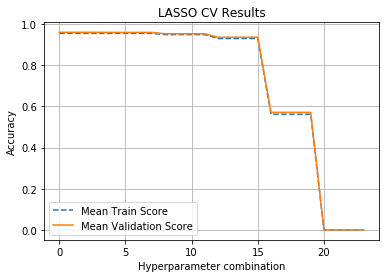

In [0]:
plt.plot(np.arange(0, len(grid_lasso.cv_results_['mean_test_score'])), grid_lasso.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_lasso.cv_results_['mean_train_score'])), grid_lasso.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('LASSO CV Results')
pd.DataFrame(grid_lasso.cv_results_['params'])

,alpha,max_iter,selection
0,0.001,1000,cyclic
1,0.001,1000,random
2,0.001,10000,cyclic
3,0.001,10000,random
4,0.010,1000,cyclic
5,0.010,1000,random
6,0.010,10000,cyclic
7,0.010,10000,random
8,0.100,1000,cyclic
9,0.100,1000,random


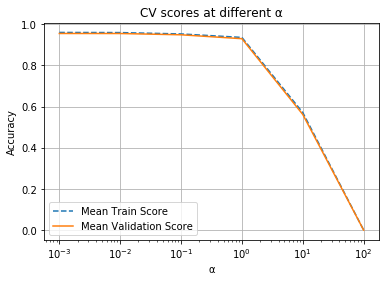

In [0]:
temp = pd.DataFrame(grid_lasso.cv_results_['params'])
temp = temp.assign(mean_test_score = pd.DataFrame(grid_lasso.cv_results_['mean_test_score']))
temp = temp.assign(mean_train_score = pd.DataFrame(grid_lasso.cv_results_['mean_train_score']))
temp_1000 = temp.groupby('alpha')['mean_test_score', 'mean_train_score'].mean().reset_index()
temp_1000
plt.plot(temp_1000['alpha'], temp_1000['mean_train_score'], '--', label = 'Mean Train Score')
plt.plot(temp_1000['alpha'], temp_1000['mean_test_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('α')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('CV scores at different α')
pd.DataFrame(grid_lasso.cv_results_['params'])

# Stochastic Gradient Descent (SGD)

SGD is an iterative method which minimizes the cost function with random individual samples. The gradient of the loss is estimated one sample at a time and the model is updated along the way with a decreasing  learning rate.

When predicting the dependent variable for this dataset, SGD Regressor produces a score of greater than 0.9 in test accuracy, however there are other models with superior scores. The model performance improves with increased iterations and prediction scores are optimal when penalizing with l1 regularizer over l2.

In [0]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
param_grid = {'penalty': ['l1', 'l2'], 'max_iter': [1000, 10000, 100000]}
grid_sgd = GridSearchCV(sgd, param_grid, cv=5, n_jobs= -1)
grid_sgd.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_sgd.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_sgd.best_score_))

Best Parameters : {'max_iter': 10000, 'penalty': 'l2'}
Best CV score   : 0.026


In [0]:
sgd_train_accuracy = grid_sgd.best_estimator_.score(X_train, y_train)
sgd_test_accuracy  = grid_sgd.best_estimator_.score(X_test, y_test)

print('SGD - Train Accuracy: %.3f'%sgd_train_accuracy)
print('SGD - Test Accuracy: %.3f '%sgd_test_accuracy)

table.append(['Stochastic Gradient Discent', grid_sgd.best_params_, sgd_train_accuracy, sgd_test_accuracy])

SGD - Train Accuracy: 0.026
SGD - Test Accuracy: 0.028 


,max_iter,penalty
0,1000,l1
1,1000,l2
2,10000,l1
3,10000,l2
4,100000,l1
5,100000,l2


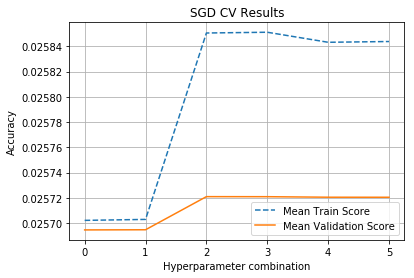

In [0]:
plt.plot(np.arange(0, len(grid_sgd.cv_results_['mean_test_score'])), grid_sgd.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_sgd.cv_results_['mean_train_score'])), grid_sgd.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('SGD CV Results')
pd.DataFrame(grid_sgd.cv_results_['params'])

# Simple SVR

Simple SVR is Linear Support Vector Regression (without kernels). This method tries to form a hyper-plane which accomodates as many points along its edges.

According to sklearn, SVR with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. This class supports both dense and sparse input.

The model performed optimally when gamma = 1, epsilon =  0.1 and loss function set to "squared_epsilon_insensitive" (l2)

In [0]:
from sklearn.svm import LinearSVR

powers = range(-2, 1)
e_range = [0]
c_range = []
for power in powers:
    e_range.append(10 ** power)
    c_range.append(10 ** power)

linear_svr = LinearSVR()
param_grid = {'C': c_range, 'epsilon': e_range, 'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'], 'max_iter': [1000, 10000]}
grid_linear_svr = GridSearchCV(linear_svr, param_grid, cv=5, n_jobs= -1)
grid_linear_svr.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_linear_svr.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_linear_svr.best_score_))

Best Parameters : {'C': 0.01, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}
Best CV score   : 0.026


In [0]:
linear_svr_train_accuracy = grid_linear_svr.best_estimator_.score(X_train, y_train)
linear_svr_test_accuracy  = grid_linear_svr.best_estimator_.score(X_test, y_test)

print('SVR_simple - Train Accuracy: %.3f'%linear_svr_train_accuracy)
print('SVR_simple - Test Accuracy: %.3f '%linear_svr_test_accuracy)

table.append(['SVR Simple', grid_linear_svr.best_params_, linear_svr_train_accuracy, linear_svr_test_accuracy])

SVR_simple - Train Accuracy: 0.026
SVR_simple - Test Accuracy: 0.028 


,C,epsilon,loss,max_iter
0,0.01,0.00,epsilon_insensitive,1000
1,0.01,0.00,epsilon_insensitive,10000
2,0.01,0.00,squared_epsilon_insensitive,1000
3,0.01,0.00,squared_epsilon_insensitive,10000
4,0.01,0.01,epsilon_insensitive,1000
5,0.01,0.01,epsilon_insensitive,10000
6,0.01,0.01,squared_epsilon_insensitive,1000
7,0.01,0.01,squared_epsilon_insensitive,10000
8,0.01,0.10,epsilon_insensitive,1000
9,0.01,0.10,epsilon_insensitive,10000


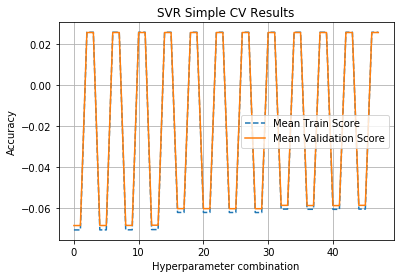

In [0]:
plt.plot(np.arange(0, len(grid_linear_svr.cv_results_['mean_test_score'])), grid_linear_svr.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_linear_svr.cv_results_['mean_train_score'])), grid_linear_svr.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('SVR Simple CV Results')
pd.DataFrame(grid_linear_svr.cv_results_['params'])

# SVR kernel= 'linear'

In [0]:
from sklearn.svm import SVR

model1 = (SVR(kernel='linear'))

param_grid = {'C': c_range, 'epsilon': e_range}
grid_svr_l = GridSearchCV(model1, param_grid, cv=5, n_jobs= -1)
grid_svr_l.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_svr_l.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_svr_l.best_score_))

Best Parameters : {'C': 1, 'epsilon': 1}
Best CV score   : -0.061


In [0]:
svr_l_train_accuracy = grid_svr_l.best_estimator_.score(X_train, y_train)
svr_l_test_accuracy  = grid_svr_l.best_estimator_.score(X_test, y_test)

print('SVR_kernel_linear - Train Accuracy: %.3f'%svr_l_train_accuracy)
print('SVR_kernel_linear - Test Accuracy: %.3f '%svr_l_test_accuracy)

table.append(['SVR kernel = Linear', grid_svr_l.best_params_, svr_l_train_accuracy, svr_l_test_accuracy])

SVR_kernel_linear - Train Accuracy: -0.059
SVR_kernel_linear - Test Accuracy: -0.065 


,C,epsilon
0,0.01,0.00
1,0.01,0.01
2,0.01,0.10
3,0.01,1.00
4,0.10,0.00
5,0.10,0.01
6,0.10,0.10
7,0.10,1.00
8,1.00,0.00
9,1.00,0.01


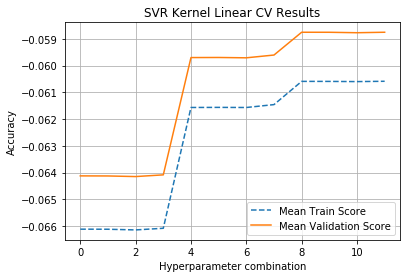

In [0]:
plt.plot(np.arange(0, len(grid_svr_l.cv_results_['mean_test_score'])), grid_svr_l.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_svr_l.cv_results_['mean_train_score'])), grid_svr_l.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combination')
plt.ylabel('Accuracy')
plt.title('SVR Kernel Linear CV Results')
pd.DataFrame(grid_svr_l.cv_results_['params'])

# SVR kernel = 'rbf'

In [0]:
model2 = (SVR(kernel='rbf'))

param_grid = {'C': c_range, 'epsilon': e_range, 'gamma': [10**-2, 10**-3], 'shrinking': [True, False] }
grid_svr_rbf = GridSearchCV(model2, param_grid, cv=5, n_jobs= -1)
grid_svr_rbf.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_svr_rbf.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_svr_rbf.best_score_))

Best Parameters : {'C': 1, 'epsilon': 1, 'gamma': 0.01, 'shrinking': False}
Best CV score   : -0.064


In [0]:
svr_rbf_train_accuracy = grid_svr_rbf.best_estimator_.score(X_train, y_train)
svr_rbf_test_accuracy  = grid_svr_rbf.best_estimator_.score(X_test, y_test)

print('SVR_RBF - Train Accuracy: %.3f'%svr_rbf_train_accuracy)
print('SVR_RBF - Test Accuracy: %.3f '%svr_rbf_test_accuracy)

table.append(['SVR kernel = rbf', grid_svr_rbf.best_params_, svr_rbf_train_accuracy, svr_rbf_test_accuracy])

SVR_RBF - Train Accuracy: -0.061
SVR_RBF - Test Accuracy: -0.068 


# SVR kernel = 'poly'

In [0]:
#LINEAR REGRESSION with the normal equation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
param_grid = {}
grid_lreg = GridSearchCV(LinearRegression(), param_grid, cv=5, n_jobs= -1)
grid_lreg.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_lreg.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_lreg.best_score_))

Best Parameters : {}
Best CV score   : 0.026


In [0]:
model3 = (SVR(kernel='poly'))

param_grid = {'C': c_range, 'epsilon': e_range, 'degree': [1, 2, 3]}
grid_svr_poly = GridSearchCV(model3, param_grid, cv=5, n_jobs= -1)
grid_svr_poly.fit(X_train, y_train)

print("Best Parameters : {}".format(grid_svr_poly.best_params_))
print("Best CV score   : {}".format('%.3f'% grid_svr_poly.best_score_))

Best Parameters : {'C': 1, 'degree': 1, 'epsilon': 1}
Best CV score   : -0.061


In [0]:
svr_poly_train_accuracy = grid_svr_poly.best_estimator_.score(X_train, y_train)
svr_poly_test_accuracy  = grid_svr_poly.best_estimator_.score(X_test, y_test)

print('SVR_poly - Train Accuracy: %.3f'%svr_poly_train_accuracy)
print('SVR_poly - Test Accuracy: %.3f '%svr_poly_test_accuracy)

table.append(['SVR kernel = poly', grid_svr_poly.best_params_, svr_poly_train_accuracy, svr_poly_test_accuracy])

SVR_poly - Train Accuracy: -0.059
SVR_poly - Test Accuracy: -0.065 


# Polynomial Regression
We run a linear model after exponentially transforming the feature set. However this model performed poorly when using the 2nd and 3rd degree transformations of the feature set and was computationally demanding (impossible with available memory) to check higher degrees.

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing  import PolynomialFeatures
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(2,3)}

grid_polyreg = GridSearchCV(PolynomialRegression(), param_grid, cv=5, n_jobs = -1)

grid_polyreg.fit(X_train, y_train)
print("Best parameters: {}".format(grid_polyreg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_polyreg.best_score_))

Best parameters: {'polynomialfeatures__degree': 2}
Best cross-validation score: 0.38


In [0]:
polyreg_train_accuracy = grid_polyreg.best_estimator_.score(X_train, y_train)
polyreg_test_accuracy = grid_polyreg.best_estimator_.score(X_test, y_test)

print('Polynomial Regression - Train Accuracy: %.3f'%polyreg_train_accuracy)
print('Polynomial Regression - Test Accuracy: %.3f '%polyreg_test_accuracy)
table.append(['Polynomial Regression', grid_polyreg.best_params_, polyreg_train_accuracy, polyreg_test_accuracy])

Polynomial Regression - Train Accuracy: 0.389
Polynomial Regression - Test Accuracy: 0.427 


# Train Test Score Comparison (10% stratified data)

In [0]:
pd.set_option('display.max_colwidth', 0)
final_table = pd.DataFrame(table, columns= ['Model', 'Parameters', 'Training_Accuracy', 'Testing_Accuracy'])
final_table['difference']=final_table['Training_Accuracy'] - final_table['Testing_Accuracy']
final_table.sort_values('Testing_Accuracy', ascending = False)
#final_table


,Model,Parameters,Training_Accuracy,Testing_Accuracy,difference
3,LASSO,"{'alpha': 0.001, 'max_iter': 1000, 'selection': 'cyclic'}",0.959941,0.954053,0.005888
1,KN Regression,{'n_neighbors': 8},0.892313,0.891367,0.000946
9,Polynomial Regression,{'polynomialfeatures__degree': 2},0.389272,0.427401,-0.038129
2,Ridge,"{'alpha': 100, 'fit_intercept': True, 'normalize': False}",0.025666,0.028189,-0.002523
5,SVR Simple,"{'C': 0.01, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}",0.025670,0.028176,-0.002506
0,Linear Regression,{},0.025672,0.028162,-0.002490
4,Stochastic Gradient Discent,"{'max_iter': 10000, 'penalty': 'l2'}",0.025664,0.028160,-0.002496
6,SVR kernel = Linear,"{'C': 1, 'epsilon': 1}",-0.058700,-0.064565,0.005866
8,SVR kernel = poly,"{'C': 1, 'degree': 1, 'epsilon': 1}",-0.059147,-0.065059,0.005912
7,SVR kernel = rbf,"{'C': 1, 'epsilon': 1, 'gamma': 0.01, 'shrinking': False}",-0.061419,-0.067568,0.006149


In [0]:
old_table = pd.DataFrame({'Model':['Linear Regression','KNN Regression','Ridge','LASSO','SVR Simple','Polynomial Regression','SVR kernel=Linear','SVR kernel=rbf','SVR kernel=Poly','SGD'], 'Parameters':["{}","{'n_neighbors': 3}","{'alpha': 0.001, 'fit_intercept': True, 'normalize': True}","{'alpha': 0.001, 'max_iter': 1000, 'selection': 'cyclic'}","{'C': 1, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 10000}","{'polynomialfeatures__degree': 2}","{'C': 1, 'epsilon': 0}","{'C': 1, 'epsilon': 1, 'gamma': 0.01, 'shrinking': False}","{'C': 1, 'degree': 1, 'epsilon': 0.01}","{'max_iter': 100000,'penalty': 'l2}"],'Train_Accuracy':[0.960391,0.958155,0.95997,0.959941,0.958311,0.982402,0.287069,0.062719,-0.056494,0.947808], 'Testing_Accuracy':[0.954325,0.927733,0.954431,0.954053,0.952182,0.096465,0.313899,0.070505,-0.082018,0.916282]})
old_table.insert(2, 'Training_Accuracy', old_table['Train_Accuracy'])
del old_table['Train_Accuracy']
old_table['train-test difference']=old_table['Training_Accuracy']-old_table['Testing_Accuracy']
old_table.sort_values(['Testing_Accuracy'], ascending = False)
old_table

,Model,Parameters,Training_Accuracy,Testing_Accuracy,train-test difference
0,Linear Regression,{},0.960391,0.954325,0.006066
1,KNN Regression,{'n_neighbors': 3},0.958155,0.927733,0.030422
2,Ridge,"{'alpha': 0.001, 'fit_intercept': True, 'normalize': True}",0.959970,0.954431,0.005539
3,LASSO,"{'alpha': 0.001, 'max_iter': 1000, 'selection': 'cyclic'}",0.959941,0.954053,0.005888
4,SVR Simple,"{'C': 1, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 10000}",0.958311,0.952182,0.006129
5,Polynomial Regression,{'polynomialfeatures__degree': 2},0.982402,0.096465,0.885937
6,SVR kernel=Linear,"{'C': 1, 'epsilon': 0}",0.287069,0.313899,-0.026830
7,SVR kernel=rbf,"{'C': 1, 'epsilon': 1, 'gamma': 0.01, 'shrinking': False}",0.062719,0.070505,-0.007786
8,SVR kernel=Poly,"{'C': 1, 'degree': 1, 'epsilon': 0.01}",-0.056494,-0.082018,0.025524
9,SGD,"{'max_iter': 100000,'penalty': 'l2}",0.947808,0.916282,0.031526


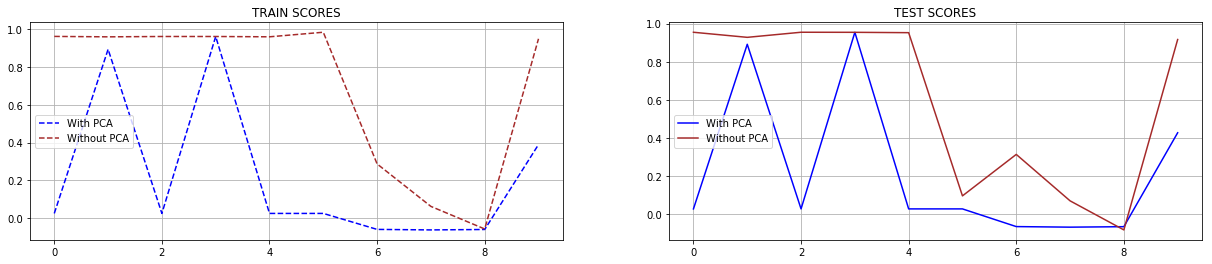

In [0]:
plt.figure(1,figsize= (21, 4))
plt.subplot(121)
plt.title('TRAIN SCORES')
plt.plot(np.arange(0, len(final_table['Model'])), final_table['Training_Accuracy'], '--',c='blue', label = 'With PCA')
plt.plot(np.arange(0, len(old_table['Model'])), old_table['Training_Accuracy'], '--',c='brown', label = 'Without PCA')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title('TEST SCORES')
plt.plot(np.arange(0, len(final_table['Model'])), final_table['Testing_Accuracy'], '-', c='blue', label = 'With PCA')
plt.plot(np.arange(0, len(old_table['Model'])), old_table['Testing_Accuracy'], '-', c='brown', label = 'Without PCA')
plt.legend()
plt.grid(True)

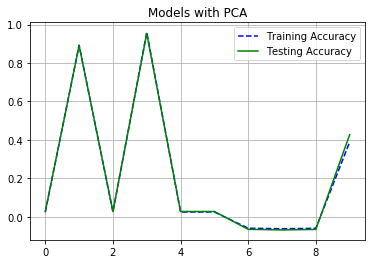

In [0]:
plt.title('Models with PCA')
plt.plot(np.arange(0, len(final_table['Model'])), final_table['Training_Accuracy'], '--',c='blue', label = 'Training Accuracy')
plt.plot(np.arange(0, len(final_table['Model'])), final_table['Testing_Accuracy'], '-', c='green', label = 'Testing Accuracy')
plt.legend()

plt.grid(True)

#### After PCA, except LASSO and KNN Regressor other models have performed poorly.
###### The over best model after PCA is LASSO.

# Deep Learning Models

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)



In [36]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
# create model
model = Sequential()
model.add(Dense(49, input_dim=d, kernel_initializer='normal', activation='relu'))
model.add(Dense(7, kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

In [0]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [75]:
model.fit(X_train, y_train, epochs = 100, batch_size = 2000)

Epoch 1/100
46660/46660 [==============================] - 0s 2us/step - loss: nan - mean_squared_error: nan
Epoch 2/100
46660/46660 [==============================] - 0s 2us/step - loss: nan - mean_squared_error: nan
Epoch 3/100
46660/46660 [==============================] - 0s 2us/step - loss: nan - mean_squared_error: nan
Epoch 4/100
46660/46660 [==============================] - 0s 2us/step - loss: nan - mean_squared_error: nan
Epoch 5/100
46660/46660 [==============================] - 0s 2us/step - loss: nan - mean_squared_error: nan
Epoch 6/100
46660/46660 [==============================] - 0s 2us/step - loss: nan - mean_squared_error: nan
Epoch 7/100
46660/46660 [==============================] - 0s 2us/step - loss: nan - mean_squared_error: nan
Epoch 8/100
46660/46660 [==============================] - 0s 3us/step - loss: nan - mean_squared_error: nan
Epoch 9/100
46660/46660 [==============================] - 0s 2us/step - loss: nan - mean_squared_error: nan
Epoch 10/100
46660/

In [80]:
# Evaluate
score, acc = nn_model_reg.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

11665/11665 [==============================] - 1s 57us/step
Test score: 345409.8394342049
Test accuracy: 345409.8394342049


In [77]:
# R2_Scores
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = nn_model_reg.predict(X_train)
y_test_predict = nn_model_reg.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.00
Test score: -0.00


### END ###